In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import OrderedDict
class ComsolOutputSorter():
    def __init__(self) -> None:
        pass
    
    def process_data_file(self) -> None:
        self.get_all_titles_and_title_indeces()
        self.count_all_eigenvalues()
        self.make_data_to_dict()
        self.make_dataframe_based_on_eigenvalues()

    def load_file(self, filename) -> None:
        with open(filename) as file:
            self.lines = file.readlines()

    def set_attributes(self, attributes: list = []) -> None:
        self.attributes = attributes

    def get_all_titles_and_title_indeces(self) -> None:
        titles = list()
        title_indeces = list()
        for index, line in enumerate(self.lines):
            if line[0] == '%':
                titles.append(line)
                title_indeces.append(index)

        self.titles = titles
        self.titles_indeces = title_indeces

    def count_all_eigenvalues(self):
        count = 0
        for line in self.lines:
            if 'lambda' in line and self.attributes[0] in line:
                count += 1
        self.count = count
        self.eigenvalues = range(1, count +1)

    def make_data_to_dict(self): # Had to be ugly because of the ugly structure of comsol outputs!
        dictionary = dict()
        for internal_index, index in enumerate(self.titles_indeces): # index of the lines
            if internal_index == len(self.titles_indeces) - 1:
                break
            this_title_index = self.titles_indeces[internal_index]
            next_title_index = self.titles_indeces[internal_index+1]
            dictionary[self.titles[internal_index]] = [float(line) for line in self.lines[this_title_index+1:next_title_index] if 'Data' in self.titles[internal_index]]
            # NOTE PROBLEM WITH HOW DCTIONARIES make their thing
            #dictionary[self.titles[internal_index]] = self.lines[this_title_index+1:next_title_index]

            #print(dictionary[self.titles[internal_index]])

        last_line = len(self.lines)
        last_title = self.titles_indeces[-1] # the line number where last title is
        dictionary[self.lines[last_title]] = [float(x) for x in self.lines[last_title+1:last_line]]
        self.data_dict = dictionary
       
    def make_dataframe_based_on_eigenvalues(self) -> pd.DataFrame:
        df_list = []
        full_frame = pd.DataFrame()
        # dc = dict()
        # for title in self.data_dict.keys():
        #     print(title)
        #     print(self.data_dict[title])

        #     if 'freq' in title:
        #         dc[title] 
        #print(self.eigenvalues)
        for eigenvalue in self.eigenvalues: # for all eigenvalues 
            #print(eigenvalue)
            dc = OrderedDict()
            for attribute in self.attributes:
                for title in self.data_dict.keys(): # we search all titles
                    #print(title.split())
                    if attribute in title and f'lambda={eigenvalue})' in title.split():
                            #print(title)
                            # row is lambda=eigenvalue
                            # column is attribute
                            dc[attribute] = str(self.data_dict[title])
            #print(dc)
        #print(dc)                            
            
            df = pd.DataFrame(data=dc, index=[eigenvalue])
            full_frame = pd.concat([full_frame, df])
            df_list.append(df)
        self.df_list = df_list
        self.data = full_frame

    def extract_feature(self, attribute: str, eigenvalue: int) -> list:
        return ast.literal_eval(self.data[attribute][eigenvalue])


class ModeClassifier():
    def __init__(self) -> None:
        pass

    def plot_mode(self):
        pass

# for alle lambda
#hvis 

# Jeg vil gerne have sådan at  ouputtet herfra er
# freq1
# numpy lambda, freq, xdata, ydata, mod

# Now instead we set the thing up to make the cut lines, and then just ignore everything else.
    

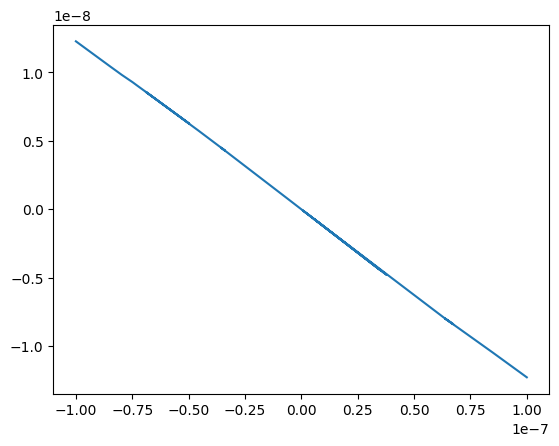

In [70]:
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom-r_bottom' ,'solid.eZZ'])
test.load_file(filename='test.txt')
test.process_data_file()
#test.extract_feature('freq', 1)


eigenvalue = 1
plt.plot(test.extract_feature('bottom-r_bottom', eigenvalue), test.extract_feature('solid.eZZ', eigenvalue), '-')
#print(test.extract_feature('bottom-r_bottom', eigenvalue))
#print(test.extract_feature('solid.eZZ', eigenvalue))
#print(test.extract_feature('freq', eigenvalue)[0])

# for pr in test.data_dict.keys():
#     print(pr)
#     print(test.data_dict[pr])



In [59]:
test.df_list[1]

,freq,bottom-r_bottom,solid.eZZ
2,"['1704766.3344140055\n', '1704766.3344140055\n...","['-1.0000000000000001E-7\n', '-8.4845179619345...","['-8.436550570626491E-9\n', '-7.16785383124411..."


In [60]:
test.df_list[1]

,freq,bottom-r_bottom,solid.eZZ
2,"['1704766.3344140055\n', '1704766.3344140055\n...","['-1.0000000000000001E-7\n', '-8.4845179619345...","['-8.436550570626491E-9\n', '-7.16785383124411..."
